In [9]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
X,y = make_regression(n_samples=500, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

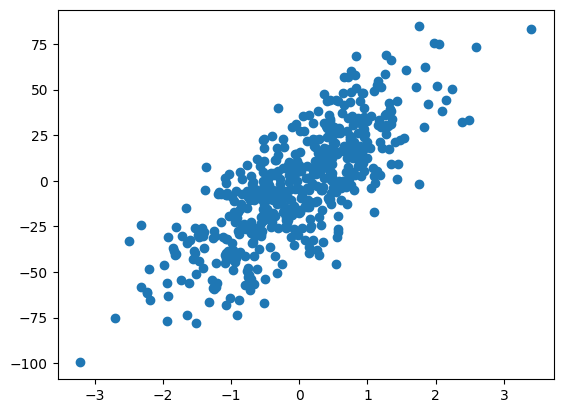

In [3]:
plt.scatter(X,y)

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [7]:
lr = LinearRegression()

In [8]:
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[24.96580541]
-2.368122920727285


In [10]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.5942968938353169

In [11]:
class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        # calcualte the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)
        
    def predict(self,X):
        return self.m * X + self.b

In [12]:
gd = GDRegressor(0.001,50)

In [13]:
gd.fit(X_train,y_train)

24.965805407915745 -2.3681229207272847


In [14]:
y_pred = gd.predict(X_test)
r2_score(y_test,y_pred)

0.5942968938353169